In [38]:
import pandas as pd
df=pd.read_csv("/content/Zomato data .csv")
print(df.head(5))

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [65]:
def func(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)
df['rate']=df['rate'].apply(func)
print(df.head(5))

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [15]:
print(df.isna().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


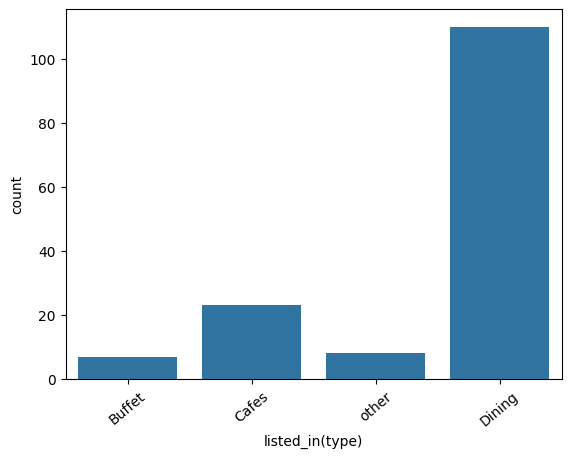

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='listed_in(type)', data=df)
plt.xticks(rotation=40)
plt.show()


In [27]:
df.head(4)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet


     type  votes
0  Buffet   3028
1   Cafes   6434
2  Dining  20363
3   other   9367


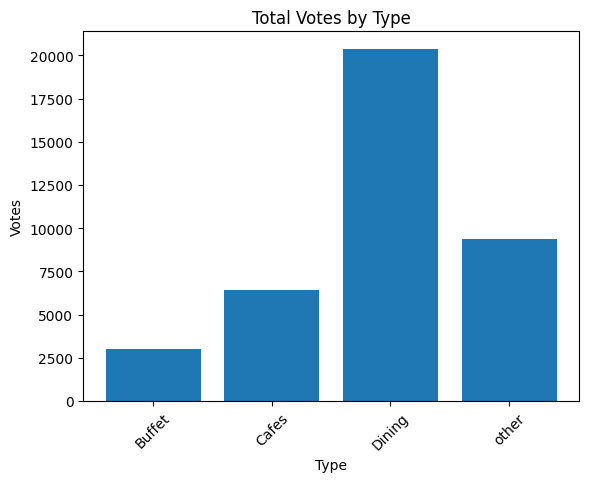

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate votes per type
votes_sum = df.groupby('listed_in(type)')['votes'].sum()

# Convert to DataFrame with x and y columns
result = pd.DataFrame({'type': votes_sum.index, 'votes': votes_sum.values})
print(result.head())

# Plot using matplotlib
plt.bar(result['type'], result['votes'])
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Votes')
plt.title('Total Votes by Type')
plt.show()





<Axes: xlabel='type', ylabel='votes'>

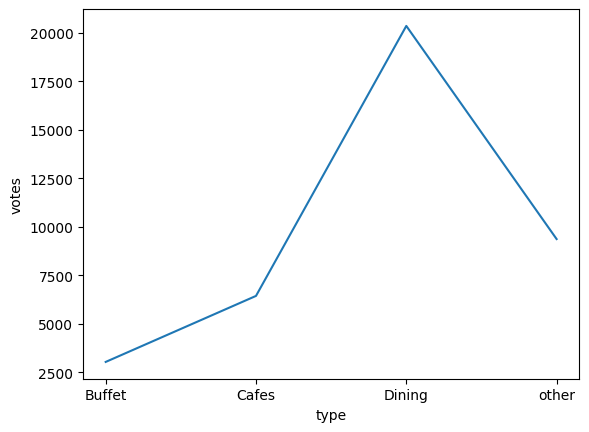

In [88]:
sns.lineplot(x=result['type'],y=result['votes'])

<Axes: xlabel='rate', ylabel='Count'>

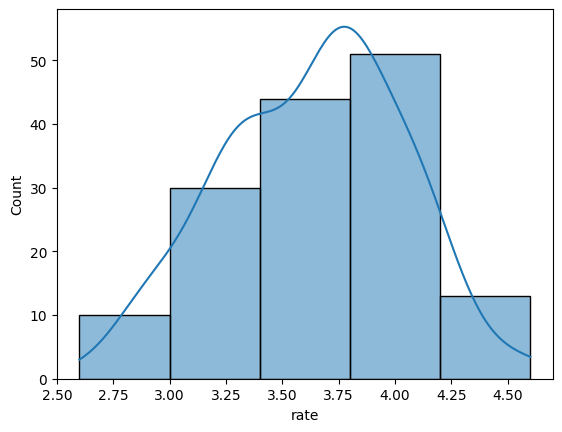

In [82]:

sns.histplot(x='rate',data=df,kde=True,bins=5)

<Axes: xlabel='rate', ylabel='count'>

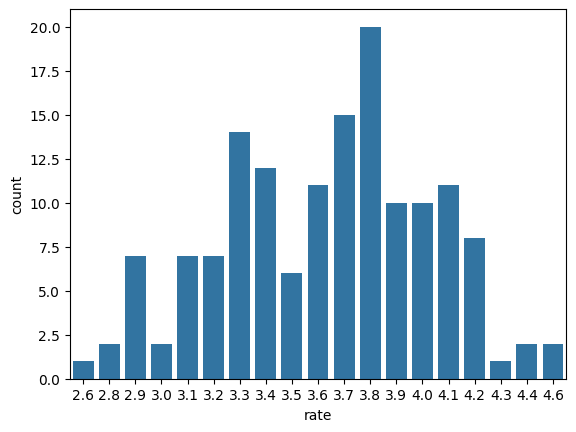

In [81]:
sns.countplot(x='rate',data=df)

In [83]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

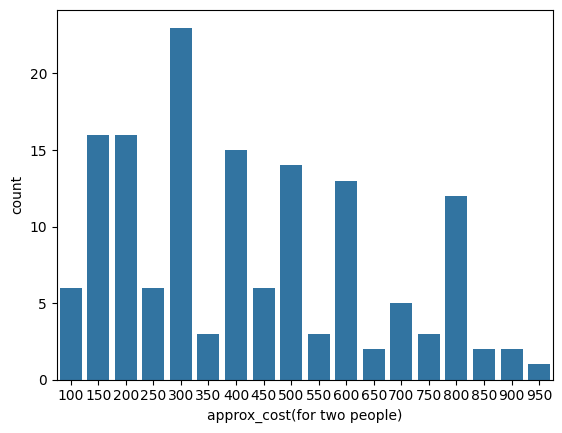

In [84]:
sns.countplot(x='approx_cost(for two people)',data=df)

No


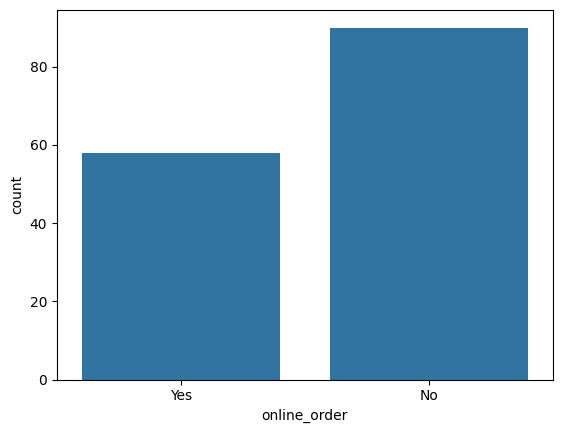

In [86]:
sns.countplot(x='online_order',data=df)
print(df['online_order'].mode()[0])

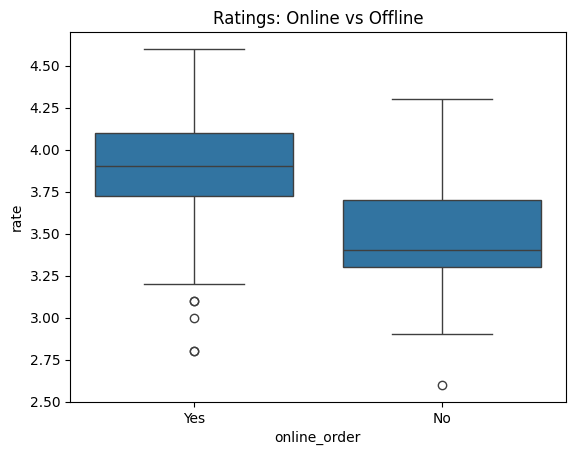

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64


In [90]:
#which mode has best rating
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Ratings: Online vs Offline')
plt.show()
print(df.groupby('online_order')['rate'].mean())


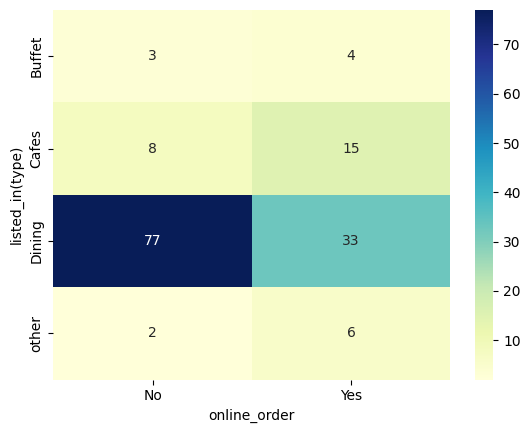

In [103]:
pivot_table = df.pivot_table(
    index='listed_in(type)',
    columns='online_order',
    aggfunc='size'
)

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.show()


